In [166]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [167]:
class Move():
    def __init__(self, axis, level, rotation):
        self.axis = axis
        self.level = level
        self.rotation = rotation
        
    def invert(self):
        return Move(self.axis, self.level, 1 - self.rotation)

In [318]:
class ComponentCube():
    def __init__(self, position, orientation):
        self.position = position
        self.orientation = orientation
        
        self.rotation_mapping = {
            'x': {'f': 'b', 'b': 'k', 'k': 't', 't': 'f', 'l': 'l', 'r': 'r'},
            'y': {'f': 'r', 'r': 'k', 'k': 'l', 'l': 'f', 't': 't', 'b': 'b'},
            'z': {'t': 'r', 'r': 'b', 'b': 'l', 'l': 't', 'f': 'f', 'k': 'k'}
        }
        
        self.position_mapping = {
            '[2, 1]': [1, 0],
            '[1, 0]': [0, 1],
            '[0, 1]': [1, 2],
            '[1, 2]': [2, 1],
            '[0, 0]': [0, 2],
            '[0, 2]': [2, 2],
            '[2, 2]': [2, 0],
            '[2, 0]': [0, 0],
            '[1, 1]': [1, 1]
        }
        
        self.projections = {
            'x': [1, 2],
            'y': [2, 0],
            'z': [0, 1]
        }
    
    def make_move(self, move: Move):
        num_rotations = int(4 * move.rotation)
        for i in range(num_rotations):
            self.get_new_orientation(move)
            self.get_new_position(move)
            
    def get_new_orientation(self, move: Move):
        self.orientation = {fixed: self.rotation_mapping[move.axis][fluid] for fixed, fluid in self.orientation.items()}
            
    def get_new_position(self, move: Move):
        position_copy = self.position.copy()
        projection = self.projections[move.axis]
        projection_coords = [position_copy[projection[0]], position_copy[projection[1]]]
        new_sub_positions = self.position_mapping[str(projection_coords)]
        self.position[projection[0]] = new_sub_positions[0]
        self.position[projection[1]] = new_sub_positions[1]
        
    def get_vertices(self, face, view):
        
        if view == 'primary':

            x = np.array([0.73, 0.18])
            y = np.array([0, 1])
            z = np.array([-0.4, 0.58])

            if face == 'f':
                bl_coords = [self.position[0] * x, self.position[1] * y, np.array([0.04, 0.04])]
                tl_coords = [self.position[0] * x, (self.position[1] + 1) * y, np.array([0.04, -0.04])]
                tr_coords = [(self.position[0] + 1) * x, (self.position[1] + 1) * y, np.array([-0.04, -0.04])]
                br_coords = [(self.position[0] + 1) * x, self.position[1] * y, np.array([-0.04, 0.04])]
            elif face == 't':
                bl_coords = [self.position[0] * x, 3 * y, self.position[2] * z, np.array([0.04, 0.04])]
                tl_coords = [self.position[0] * x, 3 * y, (self.position[2] + 1) * z, np.array([0.04, -0.04])]
                tr_coords = [(self.position[0] + 1) * x, 3 * y, (self.position[2] + 1) * z, np.array([-0.04, -0.04])]
                br_coords = [(self.position[0] + 1) * x, 3 * y, self.position[2] * z, np.array([-0.04, 0.04])]
            elif face == 'l':
                bl_coords = [self.position[1] * y, (self.position[2] + 1) * z,  np.array([0.02, 0.06])]
                tl_coords = [(self.position[1] + 1) * y, (self.position[2] + 1) * z, np.array([0.02, -0.06])]
                tr_coords = [(self.position[1] + 1) * y, self.position[2] * z, np.array([-0.02, -0.06])]
                br_coords = [self.position[1] * y, self.position[2] * z, np.array([-0.02, 0.06])]
    
        elif view == 'secondary':
            
            x = np.array([0.73, -0.18])
            y = np.array([0, 1])
            z = np.array([-0.4, -0.58])
            
            if face == 'k':
                bl_coords = [(3 - self.position[0]) * x, self.position[1] * y, np.array([0.04, 0.04])]
                tl_coords = [(3 - self.position[0]) * x, (self.position[1] + 1) * y, np.array([0.04, -0.04])]
                tr_coords = [(2 - self.position[0]) * x, (self.position[1] + 1) * y, np.array([-0.04, -0.04])]
                br_coords = [(2 - self.position[0]) * x, self.position[1] * y, np.array([-0.04, 0.04])]
            elif face == 'b':
                bl_coords = [(3 - self.position[0]) * x, (2 - self.position[2]) * z, np.array([0.04, 0.04])]
                tl_coords = [(3 - self.position[0]) * x, (3 - self.position[2]) * z, np.array([0.04, -0.04])]
                tr_coords = [(2 - self.position[0]) * x, (3 - self.position[2]) * z, np.array([-0.04, -0.04])]
                br_coords = [(2 - self.position[0]) * x, (2 - self.position[2]) * z, np.array([-0.04, 0.04])]
            elif face == 'r':
                bl_coords = [self.position[1] * y, (2 - self.position[2]) * z, np.array([0.04, 0.04])]
                tl_coords = [(self.position[1] + 1) * y, (3 - self.position[2]) * z, np.array([0.04, -0.04])]
                tr_coords = [(self.position[1] + 1) * y, (3 - self.position[2]) * z, np.array([-0.04, -0.04])]
                br_coords = [self.position[1] * y, (2 - self.position[2]) * z, np.array([-0.04, 0.04])]
            
        else:
            raise IndexError(f"View {str(view)} not valid")
            
        bl = sum(bl_coords)
        tl = sum(tl_coords)
        tr = sum(tr_coords)
        br = sum(br_coords)
        
        return [bl, tl, tr, br]

In [319]:
position = [0, 2, 1]
orientation = {
    'f': 'f',
    'k': 'k',
    'l': 'l',
    'r': 'r',
    't': 't',
    'b': 'b'
}

cc = ComponentCube(position, orientation)

In [320]:
cc.position

[0, 2, 1]

In [321]:
cc.orientation

{'f': 'f', 'k': 'k', 'l': 'l', 'r': 'r', 't': 't', 'b': 'b'}

In [322]:
cc.make_move(Move(level=1, axis='y', rotation=0.25))

In [323]:
cc.position

[1, 2, 0]

In [324]:
cc.orientation

{'f': 'r', 'k': 'l', 'l': 'f', 'r': 'k', 't': 't', 'b': 'b'}

In [325]:
class RubiksCube():
    def __init__(self, *args, **kwargs):
        self.solved_orientation = {
            'f': 'f',
            'k': 'k',
            'l': 'l',
            'r': 'r',
            't': 't',
            'b': 'b'
        }

        self.perfectly_solved_state = [
            ComponentCube(position=[i, j, k], 
                          orientation=self.solved_orientation) \
                              for i in range(3) \
                              for j in range(3) \
                              for k in range(3)
        ]

        self.NUM_SMALL_CUBES = 3 * 3 * 3
        
        self.moves_log = []
        
        if 'state' in kwargs.keys():
            self.state = kwargs['state']
        else:
            self.randomise()

    def randomise(self):
        self.state = self.perfectly_solved_state
#         for i in range(100):
#             random_move = Move(
#                 axis=np.random.choice(['x', 'y', 'z']),
#                 level=np.random.choice([0, 1, 2]),
#                 rotation=np.random.choice([0.25, 0.5, 0.75])
#             )
#             self.make_move(random_move)
    
    def get_cube_positions_to_move(self, move: Move):
        if move.axis == 'x':
            return [[move.level, i, j] for i in range(3) for j in range(3)]
        elif move.axis == 'y':
            return [[i, move.level, j] for i in range(3) for j in range(3)]
        elif move.axis == 'z':
            return [[i, j, move.level] for i in range(3) for j in range(3)]
        
    def make_move(self, move: Move):
        for i in range(self.NUM_SMALL_CUBES):
            if self.state[i].position in self.get_cube_positions_to_move(move):   
                self.state[i].make_move(move)
                self.moves_log.append(move)

    def solve(self) -> list:
        pass
    
    def is_solved(self):
        face_left = [cc.orientation['l'] for cc in self.state if cc.position[0] == 0]
        face_right = [cc.orientation['r'] for cc in self.state if cc.position[0] == 2]
        face_bottom = [cc.orientation['b'] for cc in self.state if cc.position[1] == 0]
        face_top = [cc.orientation['t'] for cc in self.state if cc.position[1] == 2]
        face_front = [cc.orientation['f'] for cc in self.state if cc.position[2] == 0]
        face_back = [cc.orientation['k'] for cc in self.state if cc.position[2] == 2]
        
        all_faces = [
            face_left,
            face_right,
            face_bottom,
            face_top,
            face_front,
            face_back
        ]
        
        each_side_num_unique = [len(set(face)) for face in all_faces]
        return each_side_num_unique == [1, 1, 1, 1, 1, 1]
    
    def __getitem__(self, ix):
        return [cc for cc in self.state if cc.position == list(ix)][0]
    
    def visualise(self):
        
        fig = plt.figure(figsize=[14, 6])
        ax = fig.add_subplot(1,2,1)
        
        colormap = {
            'f': '#d4d4d4',
            'l': '#10adf9',
            't': '#f92810',
            'r': '#10f920',
            'k': '#dff910',
            'b': '#f99110' 
        }
        
        for view in ['primary', 'secondary']:

            patches = []
            colors = []

            for i in range(3):
                for j in range(3):
                    vertices = self[0, i, j].get_vertices('l', view)
                    polygon = Polygon(vertices)
                    patches.append(polygon)
                    colors.append(colormap[self[0, i, j].orientation['l']])

            for i in range(3):
                for j in range(3):
                    vertices = self[i, 2, j].get_vertices('t', view)
                    polygon = Polygon(vertices)
                    patches.append(polygon)
                    colors.append(colormap[self[i, 2, j].orientation['t']])

            for i in range(3):
                for j in range(3):
                    vertices = self[i, j, 0].get_vertices('f', view)
                    polygon = Polygon(vertices)
                    patches.append(polygon)
                    colors.append(colormap[self[i, j, 0].orientation['f']])

            collection = PatchCollection(patches)
            ax.add_collection(collection)
            collection.set_color(colors)
            plt.xlim([-3, 3])
            plt.ylim([-1, 6])
            plt.axis('off')
            
        plt.show()

In [326]:
rc = RubiksCube()

TypeError: get_vertices() missing 1 required positional argument: 'view'

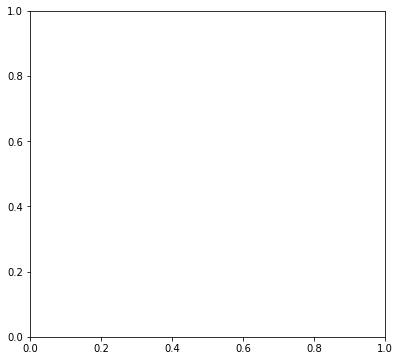

In [327]:
rc.visualise()

In [311]:
%%timeit
rc.is_solved()

26.7 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
